# Project 2

## Setup 

Download the data from the worldbank

In [1]:
# download and update the data in the project
!./setup.sh 

mkdir: cannot create directory ‘data’: File exists
--2024-09-27 14:33:54--  https://archive.ics.uci.edu/static/public/2/adult.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘adult.zip’

adult.zip               [      <=>           ] 605.70K   515KB/s    in 1.2s    

2024-09-27 14:33:57 (515 KB/s) - ‘adult.zip’ saved [620237]

Archive:  adult.zip


In [2]:
!pip install -r requirements.txt

In [3]:
import pandas as pd
import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import kruskal
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms

import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [22]:
# define the column names for the dataframe
column_names = [
    'age',          # the age of the person
    'workclass',    # The work class of the person
    'fnlwgt',        
    'education',    
    'education-num',
    'marital-status',
    'occupation', 
    'relationship',
    'race',
    'sex',
    'capital-gain',
    'capital-loss',
    'hours-per-week',
    'native-country',
    'income'
    ]

# read adult income data set
df = pd.read_csv("./data/adult.data", names=column_names, sep=", ", engine="python")

# prepare the null fields with NA values and drop the Null values
df = df.replace('?', pd.NA)
df = df.dropna()

# convert the income field to a binary value
df['income'] = df['income'].apply(lambda x: 0 if x == '<=50K' else 1)

df.head()


age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country  income  
0          2174             0              40  United-States       0  
1             0             0              13  United-States       0  
2             0             0              40  United-States       0  
3             0             0              40  United-States       0  
4             0             0              40           Cuba       0

In [5]:
# create a contingency table between education and income
contingency_table = pd.crosstab(df['education'], df['income'])

# perform chi squared
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

# Conclusion based on the p-value
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis (H₀): Education level significantly affects the likelihood of earning more than $50K per year.")
else:
    print("Fail to reject the null hypothesis (H₀): Education level does not significantly affect the likelihood of earning more than $50K per year.")

Chi-square statistic: 4070.381622360437
P-value: 0.0
Reject the null hypothesis (H₀): Education level significantly affects the likelihood of earning more than $50K per year.


In [6]:
le = LabelEncoder()
df['education_num'] = le.fit_transform(df['education'])

# Logistic regression with education as the independent variable and income as the dependent variable
X = sm.add_constant(df['education_num'])  # Add constant term
y = df['income']

# Fit logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Summary of the model
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.557921
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 income   No. Observations:                30162
Model:                          Logit   Df Residuals:                    30160
Method:                           MLE   Df Model:                            1
Date:                Fri, 27 Sep 2024   Pseudo R-squ.:                0.005751
Time:                        14:33:59   Log-Likelihood:                -16828.
converged:                       True   LL-Null:                       -16925.
Covariance Type:            nonrobust   LLR p-value:                 3.026e-44
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.6361      0.042    -39.139      0.000      -1.718      -1.554
education_num     0.

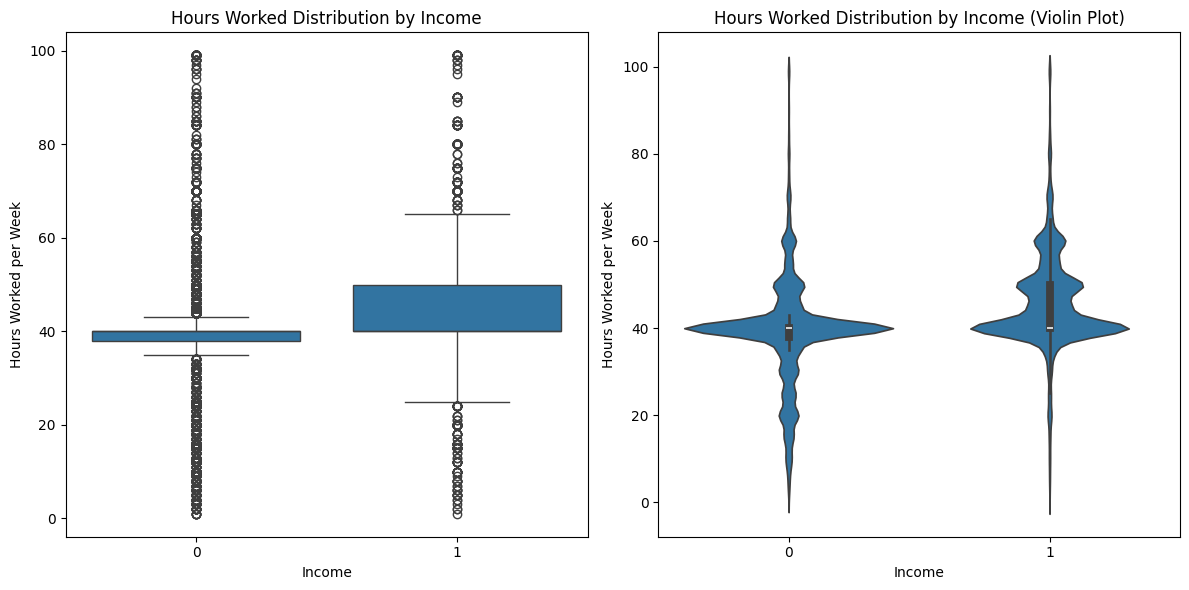

In [7]:
plt.figure(figsize=(12, 6))

# Box Plot: Hours Worked vs. Income
plt.subplot(1, 2, 1)
sns.boxplot(x='income', y='hours-per-week', data=df)
plt.title('Hours Worked Distribution by Income')
plt.xlabel('Income')
plt.ylabel('Hours Worked per Week')

# Violin Plot: Hours Worked vs. Income
plt.subplot(1, 2, 2)
sns.violinplot(x='income', y='hours-per-week', data=df)
plt.title('Hours Worked Distribution by Income (Violin Plot)')
plt.xlabel('Income')
plt.ylabel('Hours Worked per Week')

plt.tight_layout()
plt.show()

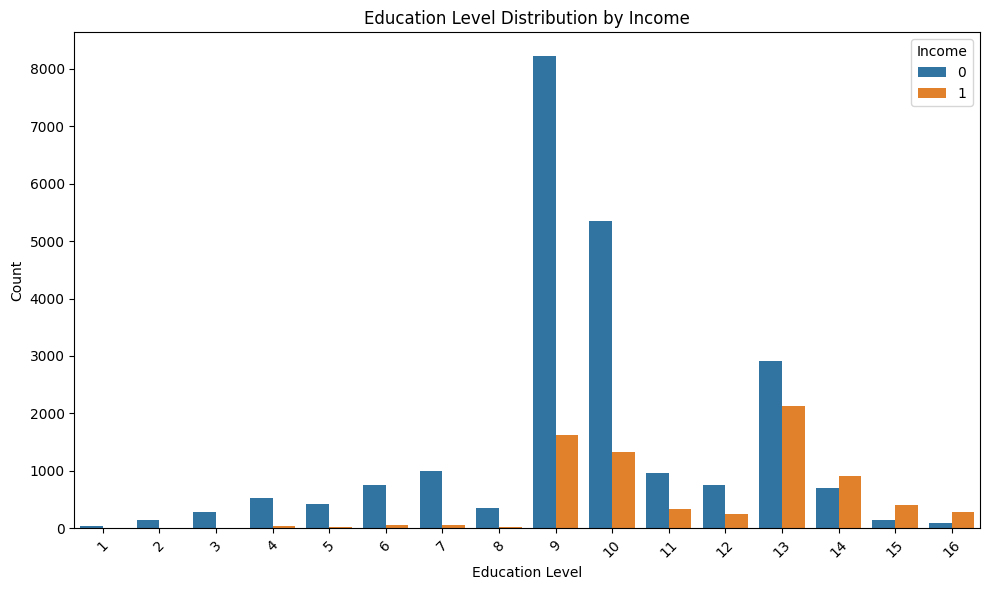

In [8]:
plt.figure(figsize=(10, 6))

# Count plot of Education Level by Income
sns.countplot(x='education-num', hue='income', data=df)
plt.title('Education Level Distribution by Income')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income')

plt.tight_layout()
plt.show()

In [9]:
from sklearn.decomposition import PCA



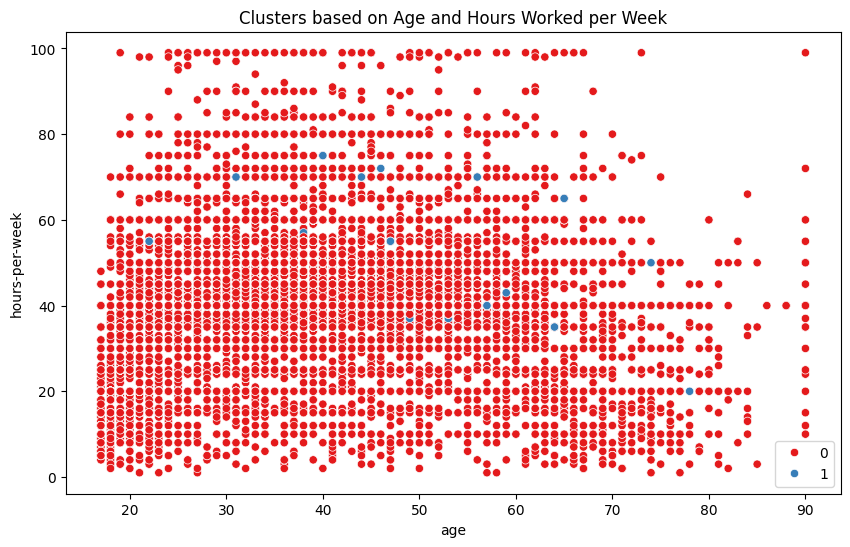

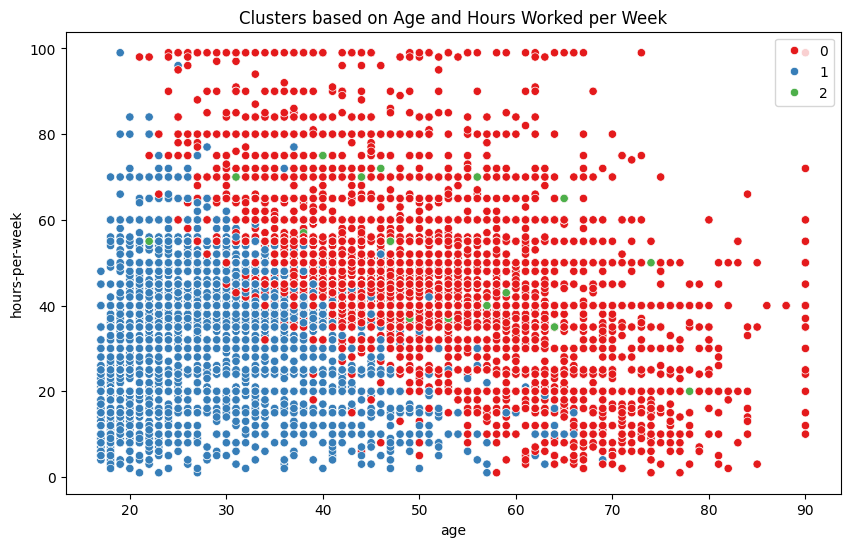

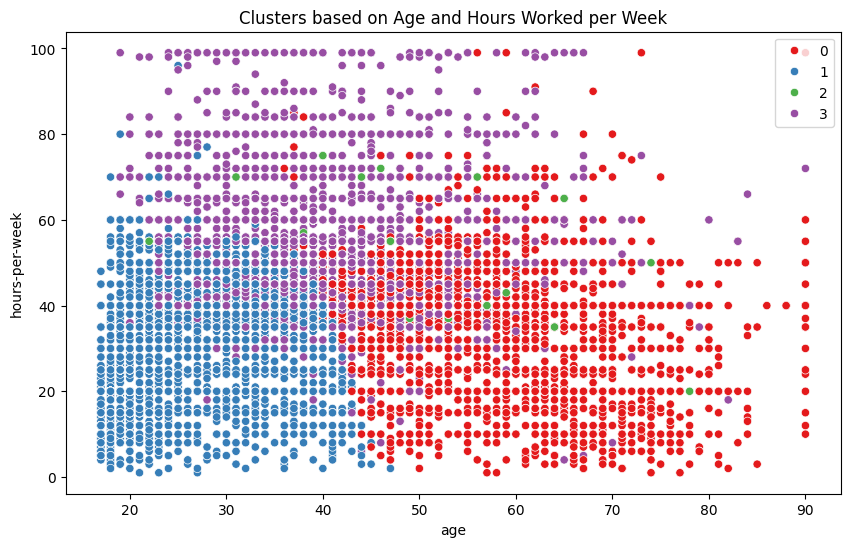

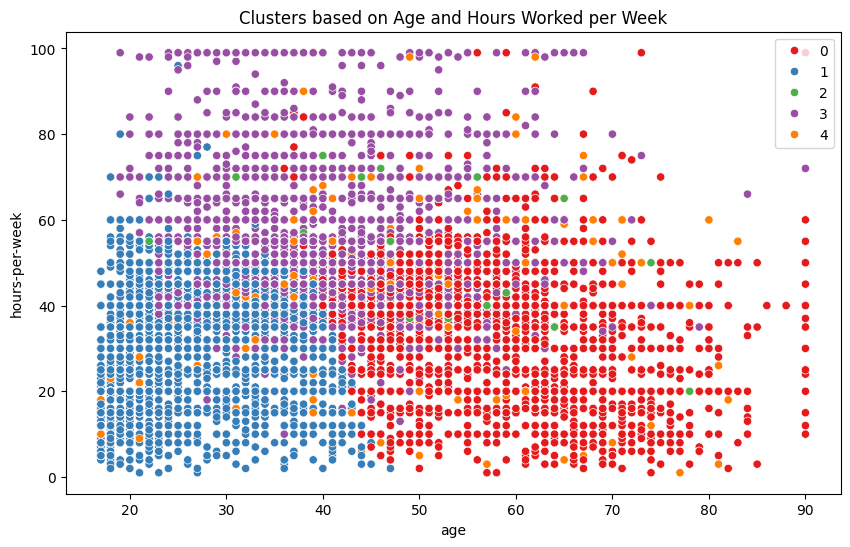

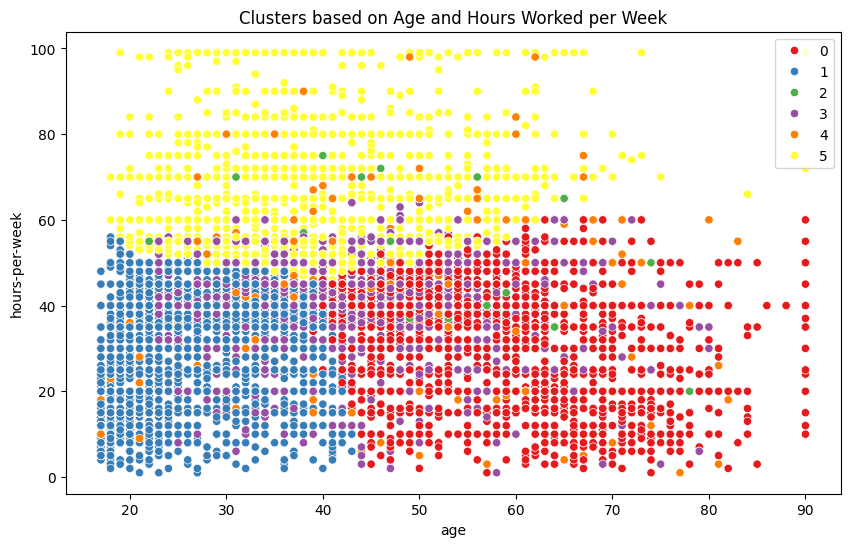

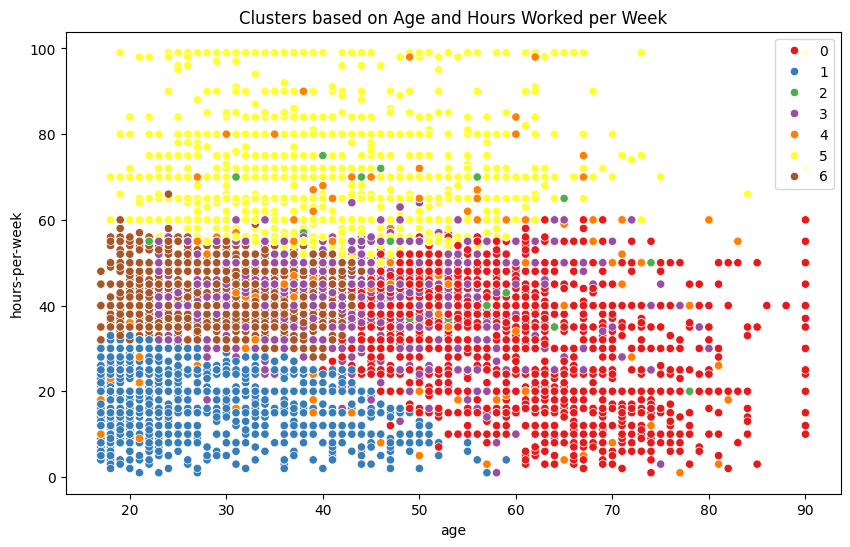

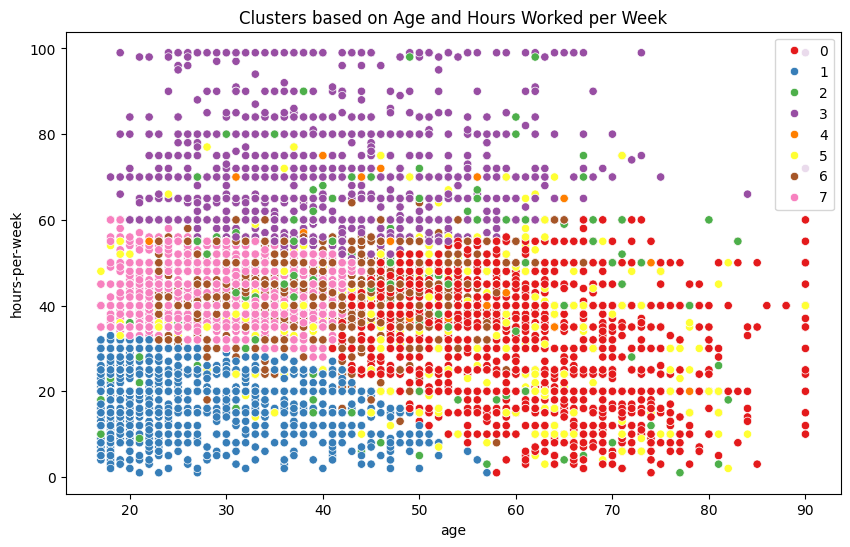

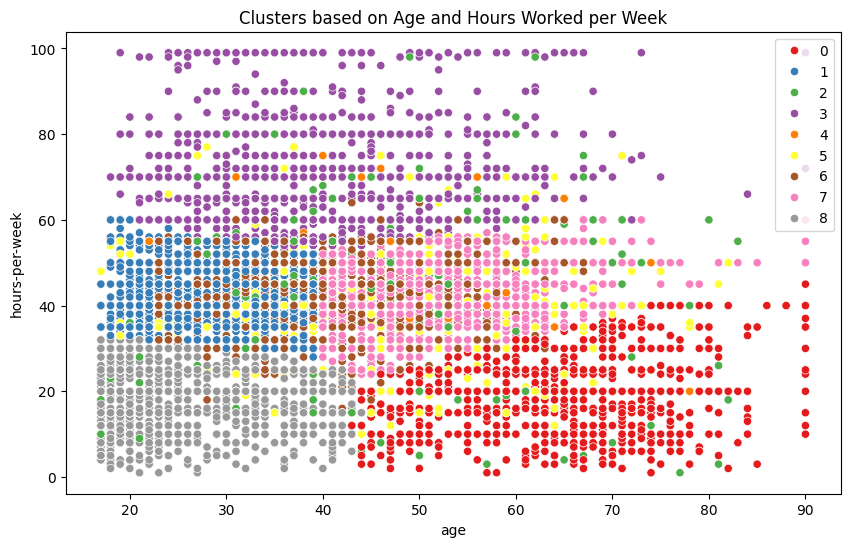

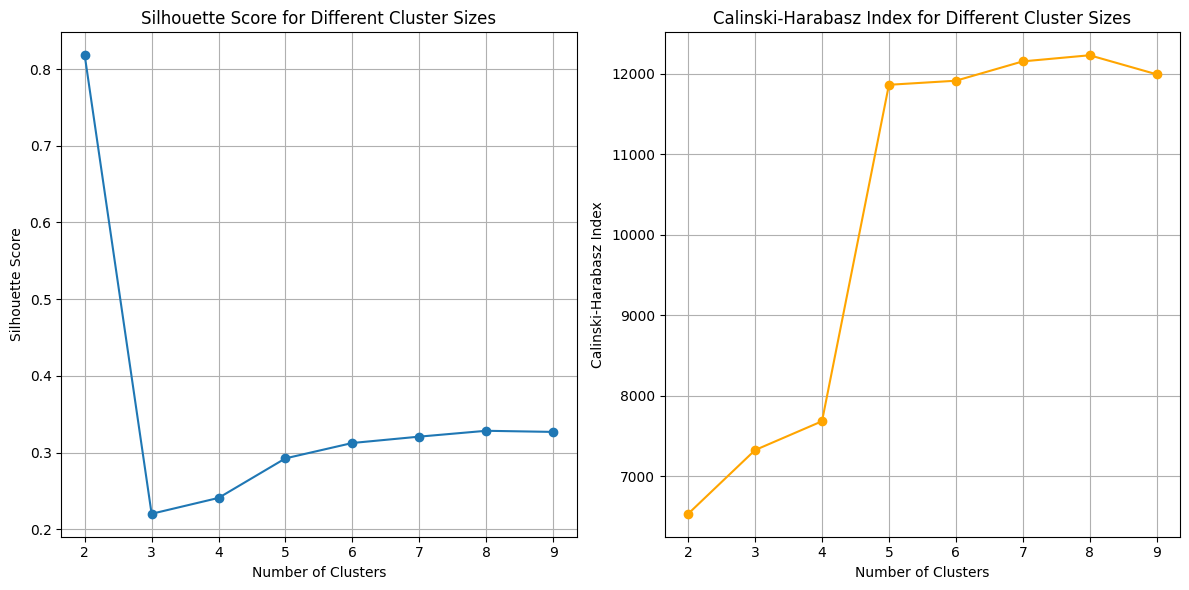

In [10]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Select relevant features for clustering
features = ['age', 'education-num', 'capital-loss', 'hours-per-week', 'capital-gain']
X_clustering = df[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)


silhouette_scores = []
calinski_harabasz_scores = []

cluster_range = range(2,10)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X_scaled)

    silhouette_avg = silhouette_score(X_scaled, labels)
    silhouette_scores.append(silhouette_avg)

    calinski_harabasz_avg = calinski_harabasz_score(X_scaled, labels)
    calinski_harabasz_scores.append(calinski_harabasz_avg)

    # Visualize clusters (e.g., age vs hours-per-week)
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='age', y='hours-per-week', hue=labels, data=df, palette='Set1')
    plt.title('Clusters based on Age and Hours Worked per Week')
    plt.show()

# Plotting the results
plt.figure(figsize=(12, 6))

# Plot Silhouette Scores
plt.subplot(1, 2, 1)
plt.plot(cluster_range, silhouette_scores, marker='o', label='Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Cluster Sizes')
plt.grid(True)

# Plot Calinski-Harabasz Index
plt.subplot(1, 2, 2)
plt.plot(cluster_range, calinski_harabasz_scores, marker='o', color='orange', label='Calinski-Harabasz Index')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index for Different Cluster Sizes')
plt.grid(True)

plt.tight_layout()
plt.show()





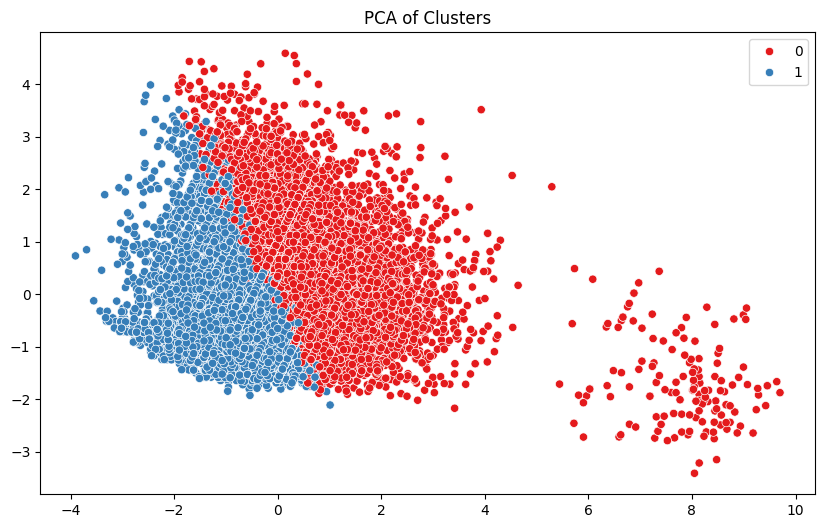

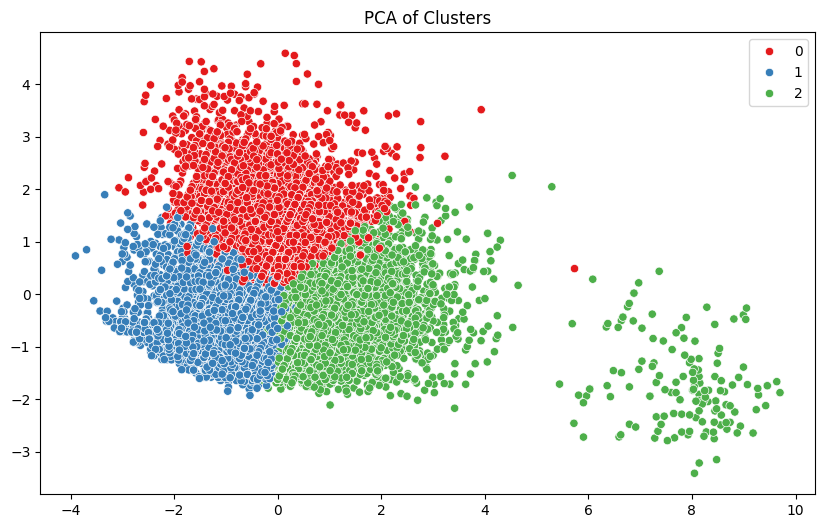

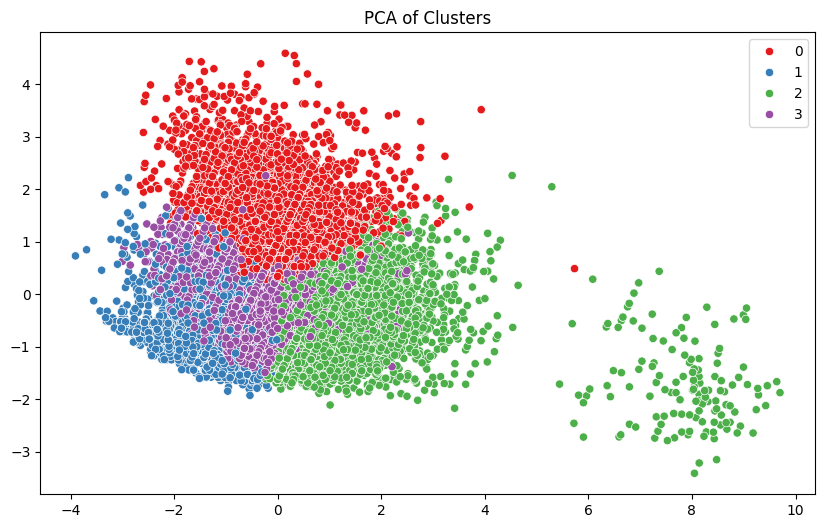

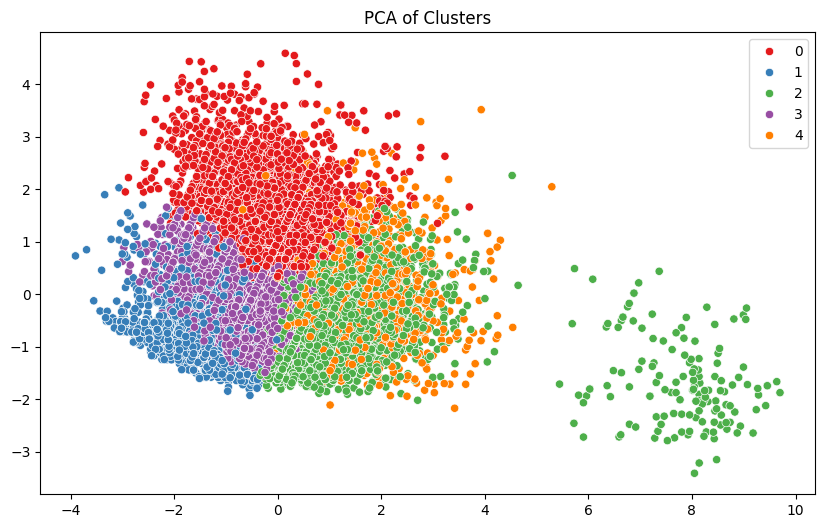

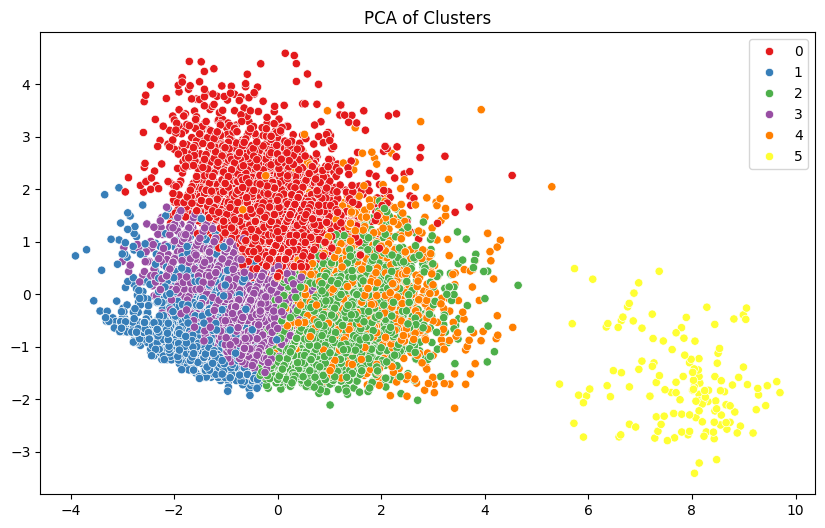

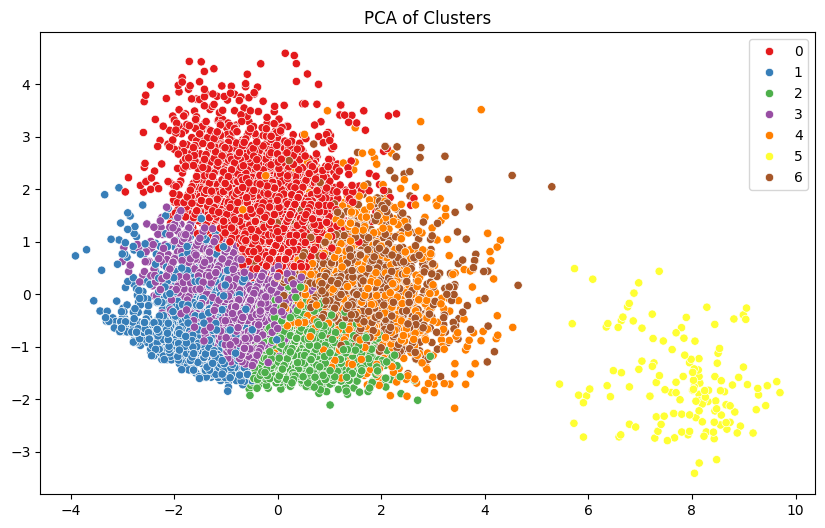

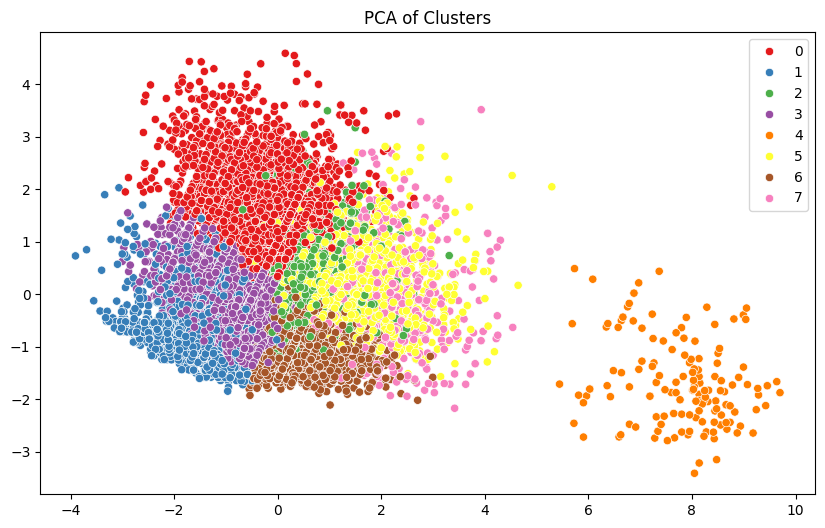

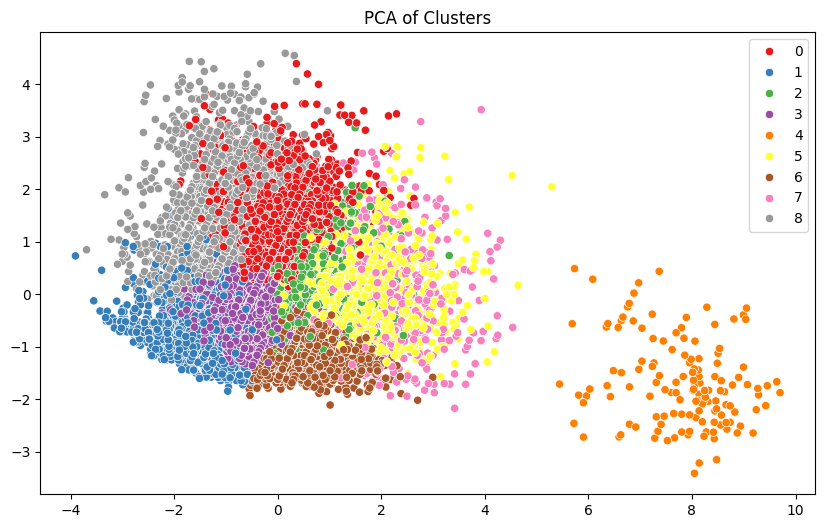

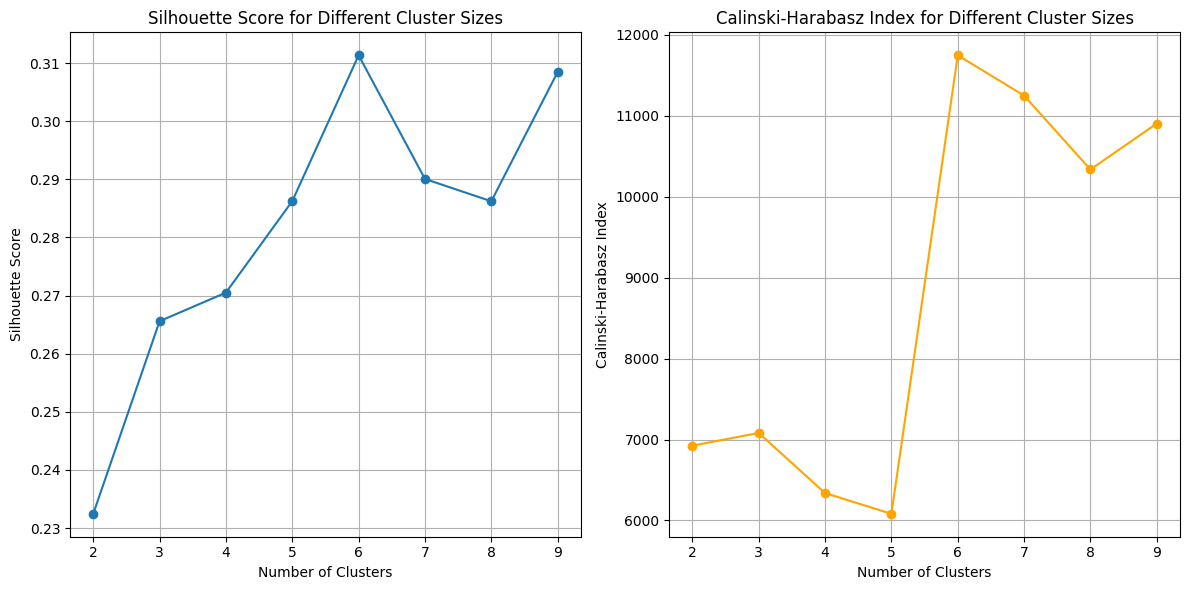

In [19]:
# Select relevant features for clustering
features = ['age', 'education-num', 'hours-per-week', 'capital-gain']
X_clustering = df[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)


silhouette_scores = []
calinski_harabasz_scores = []

cluster_range = range(2,10)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X_scaled)

    silhouette_avg = silhouette_score(X_scaled, labels)
    silhouette_scores.append(silhouette_avg)

    calinski_harabasz_avg = calinski_harabasz_score(X_scaled, labels)
    calinski_harabasz_scores.append(calinski_harabasz_avg)

    # Visualize the reduced dimensions
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='Set1')
    plt.title('PCA of Clusters')
    plt.show()


# Plotting the results
plt.figure(figsize=(12, 6))

# Plot Silhouette Scores
plt.subplot(1, 2, 1)
plt.plot(cluster_range, silhouette_scores, marker='o', label='Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Cluster Sizes')
plt.grid(True)

# Plot Calinski-Harabasz Index
plt.subplot(1, 2, 2)
plt.plot(cluster_range, calinski_harabasz_scores, marker='o', color='orange', label='Calinski-Harabasz Index')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index for Different Cluster Sizes')
plt.grid(True)

plt.tight_layout()
plt.show()

In [12]:
def Test_normally_distributed(group1, name):
    ks_eval = stats.kstest(group1, 'norm', args=(np.mean(group1), np.std(group1)))
    print(f"Kolmogorov-Smirnov Test for {name}: W={ks_eval[0]}, p-value={ks_eval[1]}")
    if ks_eval.pvalue > 0.05:
        print(f"The data is not normally distributed")
    else:
        print("The data is normally distributed")

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    stats.probplot(group1, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for {name}')
    
    plt.subplot(1, 2, 2)
    sns.histplot(group1, kde=True)
    plt.title(f'Hours Worked by {name} with KDE')

    plt.tight_layout()
    plt.show()


Kolmogorov-Smirnov Test for men: W=0.24968466158264074, p-value=0.0
The data is normally distributed


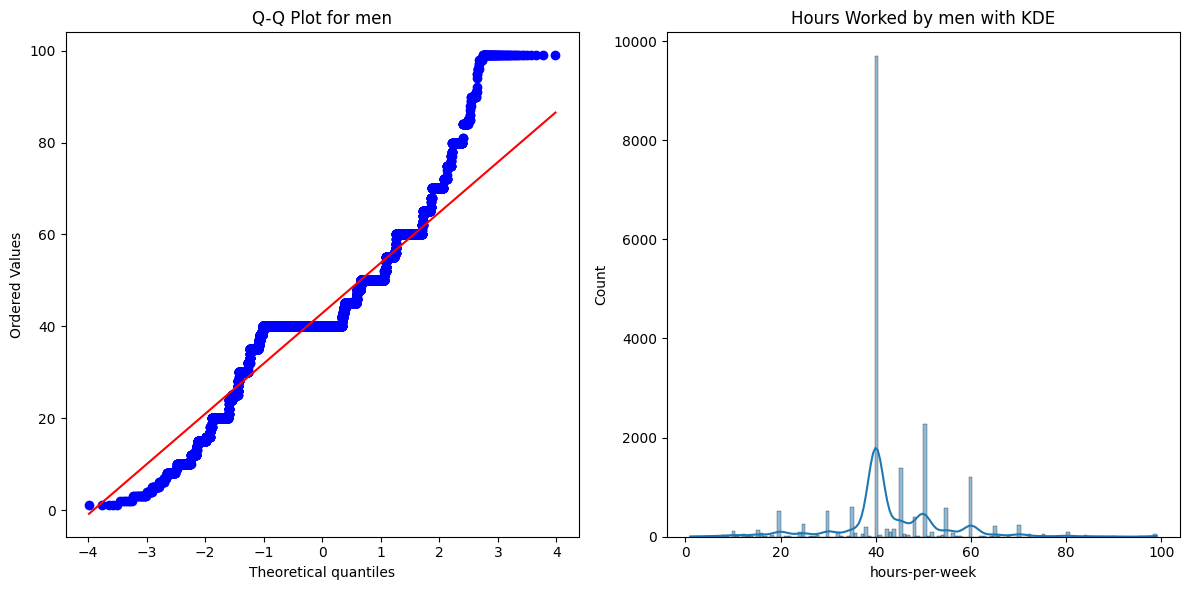

Kolmogorov-Smirnov Test for women: W=0.2414678197501433, p-value=0.0
The data is normally distributed


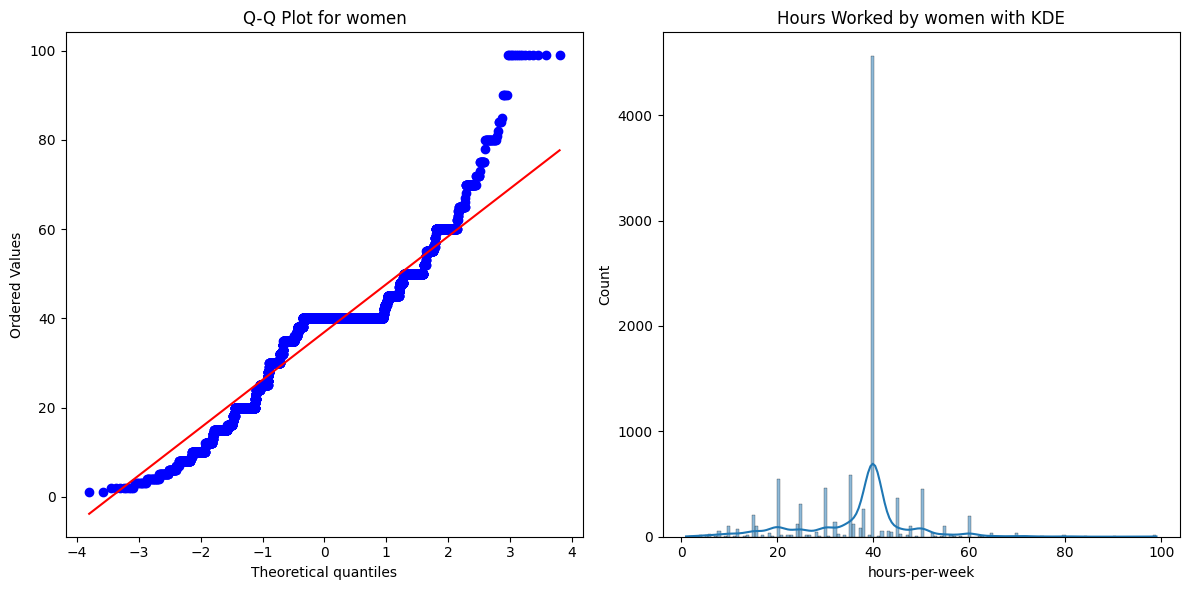

T-statistic: 41.2826615806894
P-value: 0.0
Reject the null hypothesis (H₀): There is a significant difference in hours worked between men and women.


In [13]:
from scipy.stats import ttest_ind

# Split data into two groups: Male and Female
men = df[df['sex'] == 'Male']['hours-per-week']
women = df[df['sex'] == 'Female']['hours-per-week']

# 1. Shapiro-Wilk Test
Test_normally_distributed(men, "men")
Test_normally_distributed(women, "women")

from scipy.stats import mannwhitneyu

# Perform the Mann-Whitney U Test
t_stat, p_val = ttest_ind(men, women)

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_val}')

# Conclusion based on the p-value
alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis (H₀): There is a significant difference in hours worked between men and women.")
else:
    print("Fail to reject the null hypothesis (H₀): There is no significant difference in hours worked between men and women.")


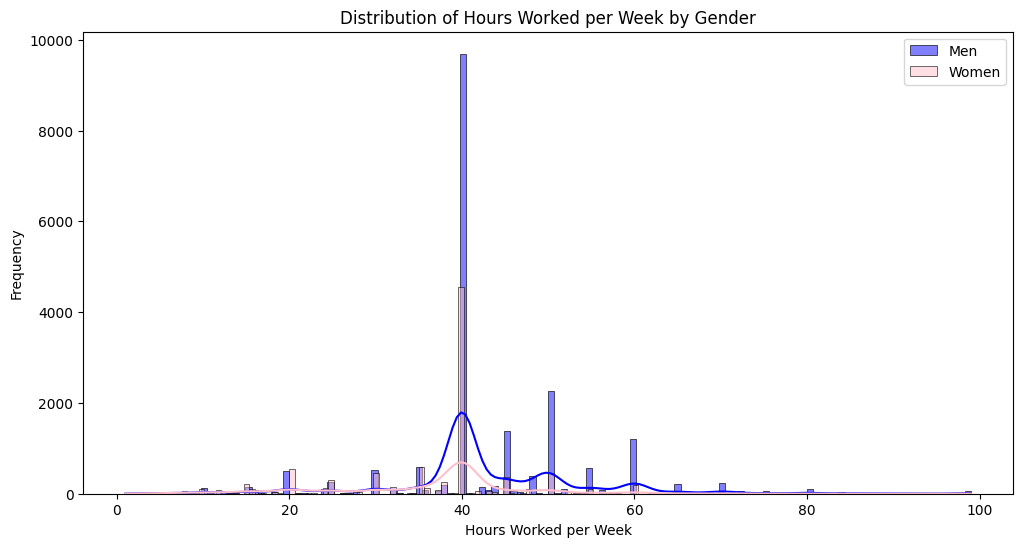

In [14]:
plt.figure(figsize=(12, 6))

# Histogram with KDE for Men
sns.histplot(df[df['sex'] == 'Male']['hours-per-week'], kde=True, color='blue', label='Men')
# Histogram with KDE for Women
sns.histplot(df[df['sex'] == 'Female']['hours-per-week'], kde=True, color='pink', label='Women')

plt.title('Distribution of Hours Worked per Week by Gender')
plt.xlabel('Hours Worked per Week')
plt.ylabel('Frequency')
plt.legend()
plt.show()

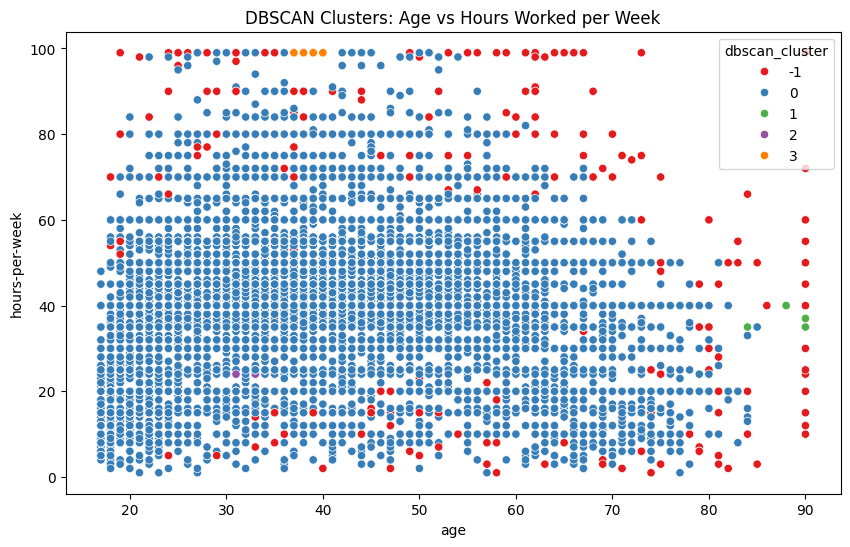

Number of clusters: 4


In [15]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Select relevant features
features = ['age', 'hours-per-week', 'education-num']
X_dbscan = df[features]

# Standardize the features
scaler = StandardScaler()
X_scaled_dbscan = scaler.fit_transform(X_dbscan)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=10)
df['dbscan_cluster'] = dbscan.fit_predict(X_scaled_dbscan)

# Visualize DBSCAN clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='hours-per-week', hue='dbscan_cluster', data=df, palette='Set1')
plt.title('DBSCAN Clusters: Age vs Hours Worked per Week')
plt.show()

# Evaluate clustering
unique_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
print(f'Number of clusters: {unique_clusters}')

In [16]:
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

# Encode race as a numerical variable
le_race = LabelEncoder()
df['race_num'] = le_race.fit_transform(df['race'])

# Logistic regression: race as independent variable, income as dependent
X_race = sm.add_constant(df['race_num'])
y_income = df['income']

# Fit logistic regression model
logit_model = sm.Logit(y_income, X_race)
logit_result = logit_model.fit()

# Output summary of logistic regression results
print(logit_result.summary())

# Interpretation based on p-values and coefficients

Optimization terminated successfully.
         Current function value: 0.558355
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 income   No. Observations:                30162
Model:                          Logit   Df Residuals:                    30160
Method:                           MLE   Df Model:                            1
Date:                Fri, 27 Sep 2024   Pseudo R-squ.:                0.004978
Time:                        14:37:23   Log-Likelihood:                -16841.
converged:                       True   LL-Null:                       -16925.
Covariance Type:            nonrobust   LLR p-value:                 1.576e-38
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9486      0.071    -27.581      0.000      -2.087      -1.810
race_num       0.2270      0.

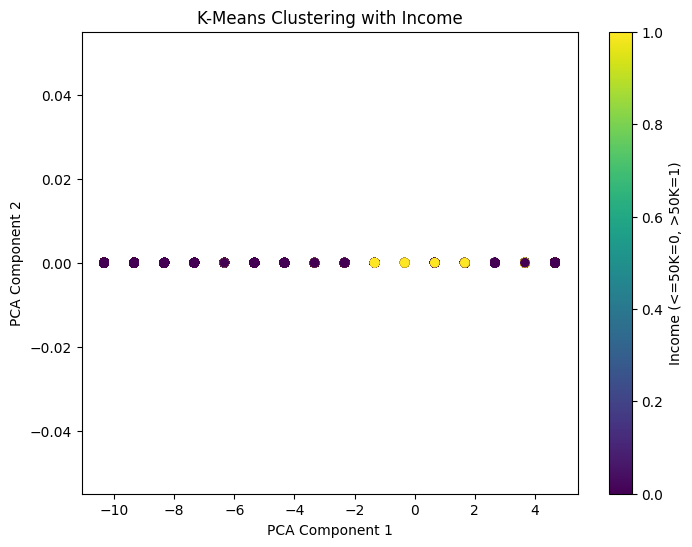

In [17]:
from sklearn.decomposition import PCA
import numpy as np

# Select relevant features for clustering
features = ['age', 'education-num', 'capital-loss', 'hours-per-week', 'capital-gain']
X_clustering = df[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Assuming `kmeans_labels` is the result of K-Means clustering
# and `X` is your feature set (e.g., 'hours_per_week', 'education_level')

# Apply PCA to reduce data to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Scatter plot with clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['income'], cmap='viridis')

plt.title('K-Means Clustering with Income')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(scatter, label='Income (<=50K=0, >50K=1)')
plt.show()

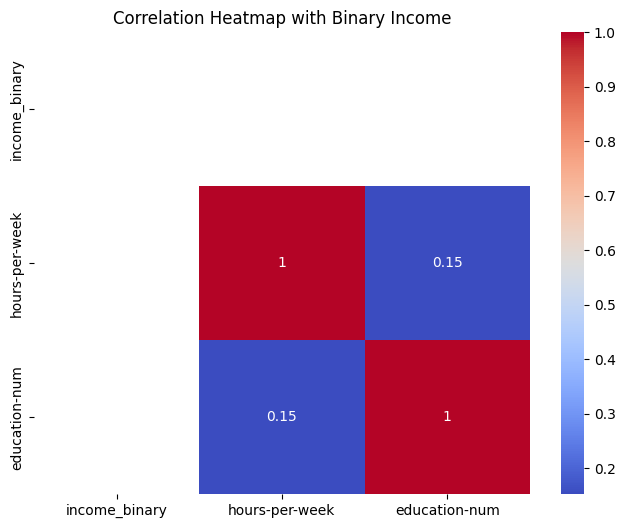

In [20]:
# Convert income to binary (0 for <=50K, 1 for >50K)
df['income_binary'] = df['income'].map({'<=50K': 0, '>50K': 1})

plt.figure(figsize=(8, 6))

# Create heatmap of correlations
sns.heatmap(df[['income_binary', 'hours-per-week', 'education-num']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap with Binary Income')
plt.show()

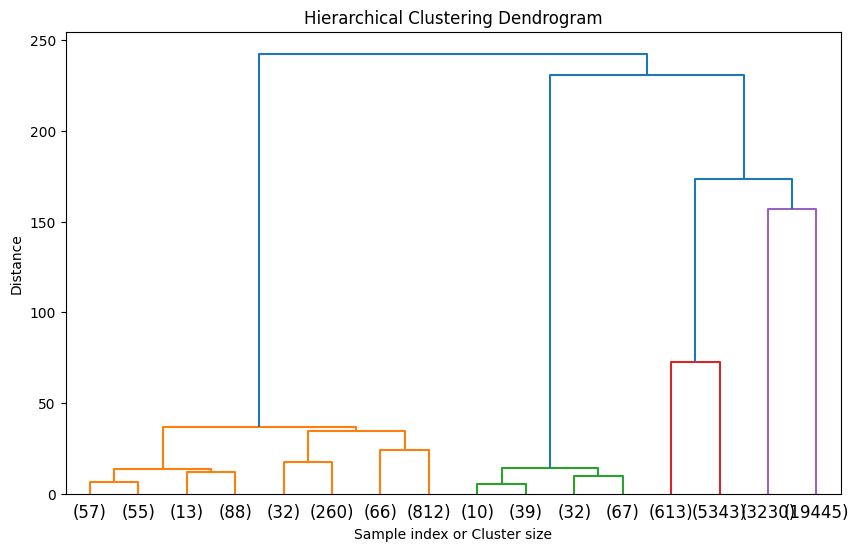

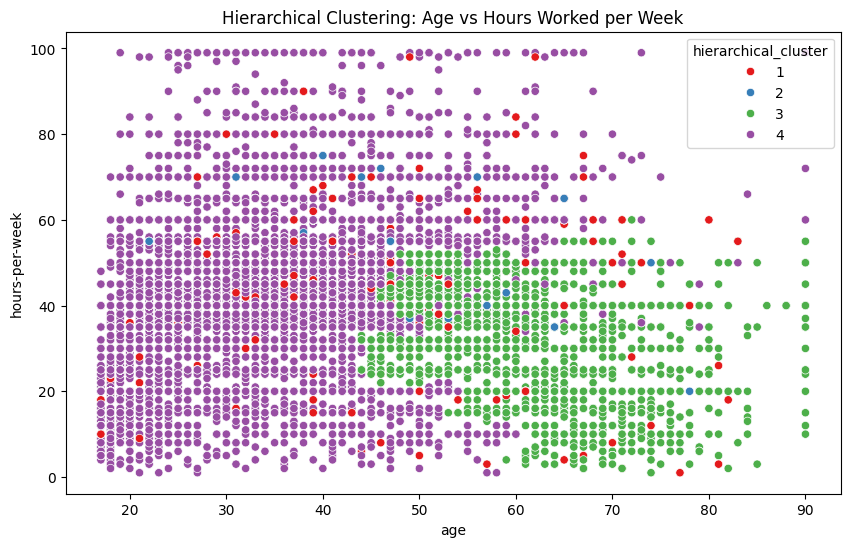

In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select relevant features
features = ['age', 'capital-gain','capital-loss' ,'hours-per-week']
X_hierarchical = df[features]

# Standardize the features
scaler = StandardScaler()
X_scaled_hierarchical = scaler.fit_transform(X_hierarchical)

# Perform hierarchical clustering (Ward's method)
Z = linkage(X_scaled_hierarchical, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z, truncate_mode='level', p=3)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index or Cluster size')
plt.ylabel('Distance')
plt.show()

# Optional: Cut the dendrogram to form clusters
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, t=4, criterion='maxclust')
df['hierarchical_cluster'] = clusters

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='hours-per-week', hue='hierarchical_cluster', data=df, palette='Set1')
plt.title('Hierarchical Clustering: Age vs Hours Worked per Week')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[['income', 'hours-per-week', 'education-num']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
sns.pairplot(df, vars=['income', 'hours-per-week', 'education-num'], hue='sex')
plt.title('Pair Plot of Income, Hours Worked, and Education')
plt.show()